Spatiotemporal Data Analyis


In [ ]:
# connect to the google drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change dir 
%cd /content/drive/MyDrive/Colab\ Notebooks/STDA/final_assignment/

/content/drive/MyDrive/Colab Notebooks/STDA/final_assignment


In [ ]:
# installing the packages
!pip install geopandas
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 16.7 MB 454 kB/s 
     |████████████████████████████████| 6.3 MB 49.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



## Time-Series Analysis of Energy Consumption in the Netherlands.


In [ ]:
# importing all packages
# these packages for dataset 
import pandas as pd
import numpy as np
import datetime as datetime


# for auto correlation and ploting the result 
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Part-2 packages 
import geopandas as gpd



In [ ]:
# Load the dataset

Series = pd.read_csv('data/2079517_time.csv',  header=0, index_col=0, parse_dates=True, squeeze=True)

# check the data 
Series.head()
# getting earlist and latest data 


1986-01-01    5774
1986-02-01    5246
1986-03-01    5422
1986-04-01    5272
1986-05-01    5008
Name: Consumption, dtype: int64

In [ ]:
# Find the earliest date and the most recent date of your dataset.
print("The earliest date:", Series.index.min())
print("Most recent date:", Series.index.max())


The earliest date: 1986-01-01 00:00:00
Most recent date: 2020-02-01 00:00:00


Missing data in dataset is: 0


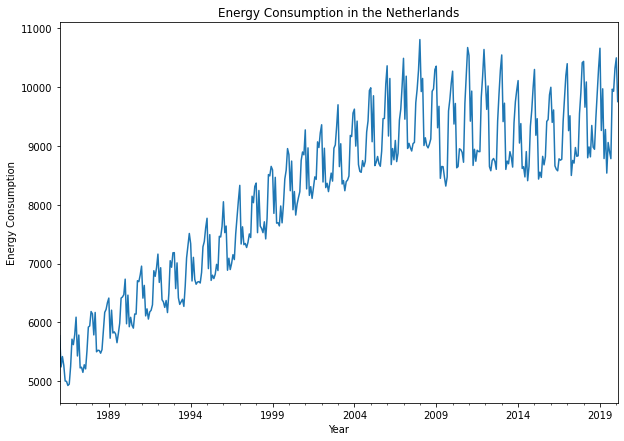

In [ ]:

# checking missing dataa 
print("Missing data in dataset is:",Series.isnull().any().sum())

# quick look at the data with plot 
plt.figure(figsize= (10,7))
Series.plot(), plt.title("Energy Consumption in the Netherlands")
plt.ylabel('Energy Consumption'), plt.xlabel("Year")
plt.show()

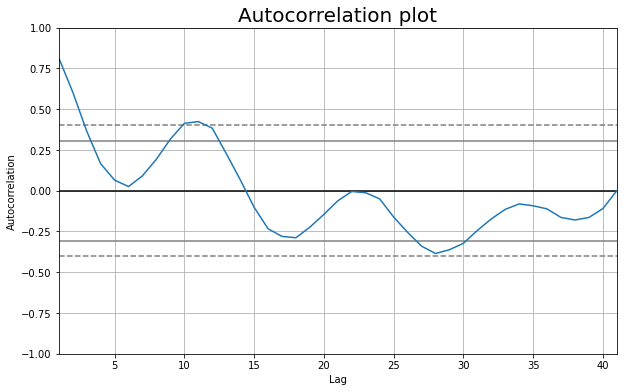

In [ ]:
# importing the packages

# compute autocorrelation and plot it 
autoCorr  = acf (Series, fft= False)
#utoCorr_series = pd.Series(whiteNoise)
plt.figure(figsize = (10,6 ))

autocorrelation_plot(autoCorr)
plt.title("Autocorrelation plot", fontdict = {'fontsize': 20})
plt.show()
#


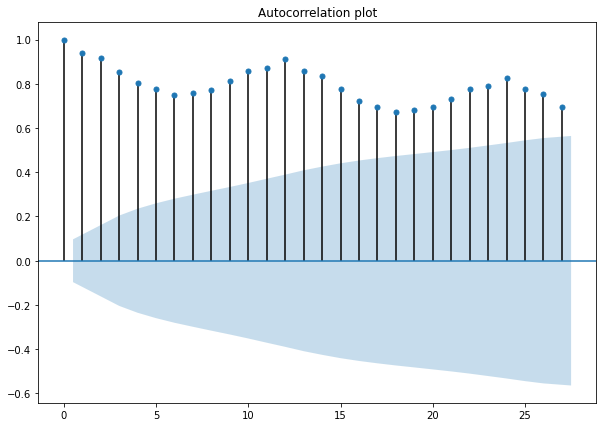

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf( Series), plt.title("Autocorrelation plot")
plt.show()

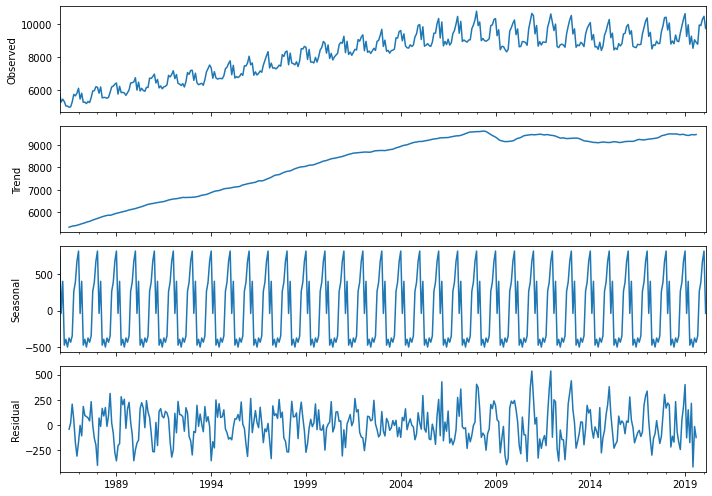

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(Series, model='additive', freq = 12)
plt.rcParams["figure.figsize"] = (10,7)
result.plot()
plt.show()

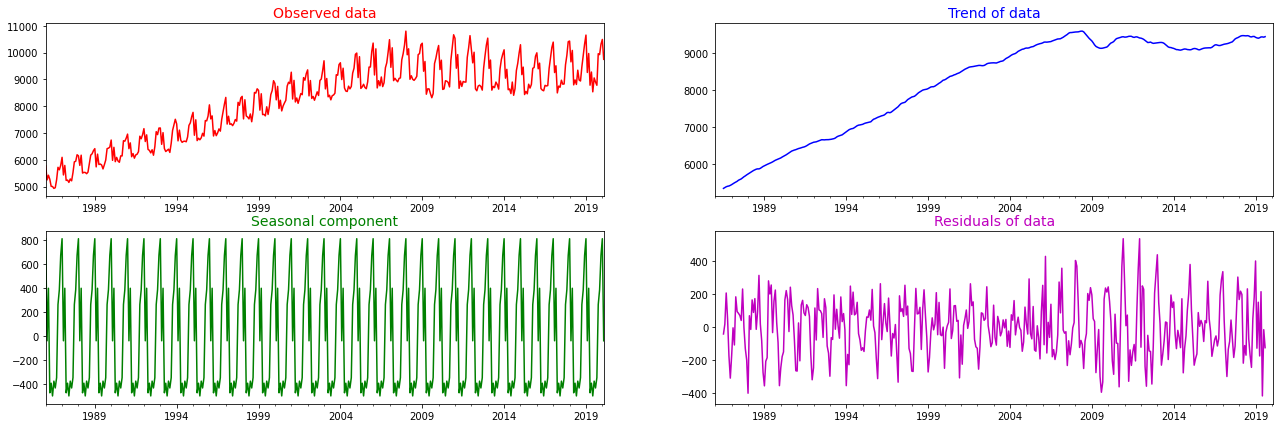

In [23]:
#
# Your code goes here 
# 4.1 Separate the trend, seasonal and residual noise components. Display each component separately. Display the residual noise as a scatter plot and QQ plot. 

# seperate the components using seasonal_decompose() with additive model 

result = seasonal_decompose(Series, model='additive', freq = 12)

# assigninng each part to variabels
observed = result.observed
trend = result.trend 
seasonal = result.seasonal
residuals = result.resid

# ploting each components seperately 
plt.figure(figsize = (22,7))
plt.subplot(221), observed.plot(color ="r"), plt.title("Observed data", fontdict = {'fontsize': 14}, color ='r')
plt.subplot(222), trend.plot(color ="b"), plt.title("Trend of data", fontdict = {'fontsize': 14}, color = 'b')
plt.subplot(223), seasonal.plot(color ="g"), plt.title("Seasonal component", fontdict = {'fontsize': 14}, color = "g")
plt.subplot(224), residuals.plot(color ="m"), plt.title("Residuals of data", fontdict = {'fontsize': 14}, color ="m")
plt.show()


<font color='blue'> 
From your interpretation of the residual plots, are there  cyclic, trend or seasonal effects which are unaccounted for?

<font color='blue'> 
Answer: From the plots can been seen that there are trend and seasonal effect in this data. The residual component of data shows that there is cyclic effect in every year in residuals.

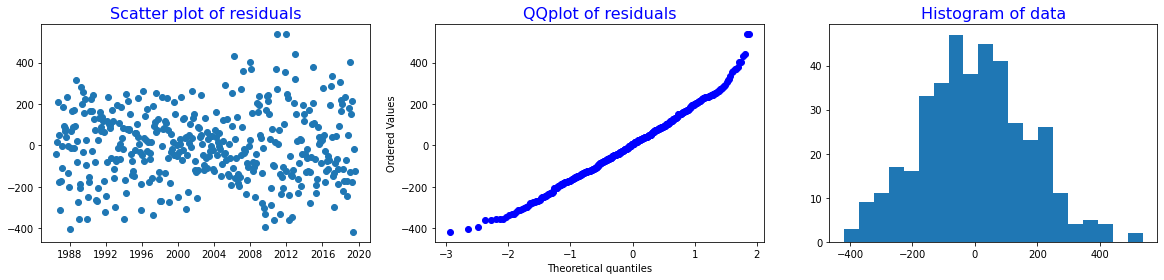

The QQplot and histogram show the data is Normally distributed. In next step, I will closely look at this.


In [25]:
#4.2 isplay the residual noise as a scatter plot and QQ plot.

# setting subplots 

fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
# residuals to dataframe   
residuals = pd.DataFrame(residuals)

#plotting the residulas as scatterplot
ax[0].scatter(residuals.index, residuals.values),
ax[0].set_title("Scatter plot of residuals", fontdict ={"fontsize":16}, color ='b')

# get the values out ot list of list 
values= np.array([i[0] for i in residuals.values])

# plot the QQplot of residuals
res= stats.probplot(values, plot= ax[1], dist="norm", fit=True), 
ax[1].set_title("QQplot of residuals",fontdict ={"fontsize":16}, color ='b')

# plotting histogram to check the distribution
ax[2].hist(values, bins = 20)
ax[2].set_title ("Histogram of data", fontdict ={"fontsize":16}, color ='b')

plt.show()

print('''The QQplot and histogram show the data is Normally distributed. In next step, I will closely look at this.''')

In [26]:
# 4.2 Check stationary and log transform 
from statsmodels.tsa.stattools import adfuller

X = Series.values

# This code is modified from :https://machinelearningmastery.com/time-series-data-stationary-python/

# calling ADF test X whether data is stationary or not 

result = adfuller(X) 
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value),"\n")

print("p-value is bigger than 0.05, so fail to reject the null hypothesis (H0).Data is non-stationary.\n")
print("*"*100)


# log transform to make data Stationary

X_log = np.log(X)
result = adfuller(X_log)
print('ADF Statistic for log transformed: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value),"\n")
 
print("After log transformation, the p-value is smaller than 0.05. Now I can reject the null hypothesis (H0), so Data is now stationary.\n")


ADF Statistic: -2.782227
p-value: 0.060858
Critical Values:
	1%: -3.447 

	5%: -2.869 

	10%: -2.571 

p-value is bigger than 0.05, so fail to reject the null hypothesis (H0).Data is non-stationary.

****************************************************************************************************
ADF Statistic for log transformed: -3.718311
p-value: 0.003863
Critical Values:
	1%: -3.447 

	5%: -2.869 

	10%: -2.571 

After log transformation, the p-value is smaller than 0.05. Now I can reject the null hypothesis (H0), so Data is now stationary.



In [27]:
#

# Split the time series into a train and test set with log transformed data


# seperating point with 10% of data voor testing 
sep_point = len(X_log)- int(len(X_log)*0.10)

# train test split 
train, test = X_log[1:sep_point], X_log[sep_point:]

# print training and test-set size 
print("Size of trainingset:", len(train))
print("Size of testset:", len(test))
print("*"*30, "let's check mean and variance", "*"*30)

# check data if the mean is Stationary  or not 

mean1, mean2 = train.mean(), test.mean()
var1, var2 = train.var(),test.var()
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2), "\n")
print("Mean values are close to each other after log transformation")


Size of trainingset: 368
Size of testset: 41
****************************** let's check mean and variance ******************************
mean1 = 8.974928, mean2 = 9.153683
variance1=0.034723, variance2=0.004296 

Mean values are close to each other after log transformation


predicted=9.142814, expected=9.149422
predicted=9.148720, expected=9.189934
predicted=9.192557, expected=9.229162
predicted=9.199930, expected=9.248599
predicted=9.142465, expected=9.132811
predicted=9.159744, expected=9.159784
predicted=9.066998, expected=9.047115
predicted=9.061397, expected=9.076695
predicted=9.049614, expected=9.071538
predicted=9.071408, expected=9.101418
predicted=9.076320, expected=9.084664
predicted=9.081228, expected=9.085684
predicted=9.137789, expected=9.163458
predicted=9.144654, expected=9.199785
predicted=9.188910, expected=9.250234
predicted=9.191888, expected=9.252346
predicted=9.139181, expected=9.174920
predicted=9.150943, expected=9.218309
predicted=9.066928, expected=9.081825
predicted=9.062858, expected=9.102532
predicted=9.045189, expected=9.083643
predicted=9.064987, expected=9.142276
predicted=9.074670, expected=9.102087
predicted=9.082994, expected=9.098067
predicted=9.134313, expected=9.155673
predicted=9.141358, expected=9.200088
predicted=9.

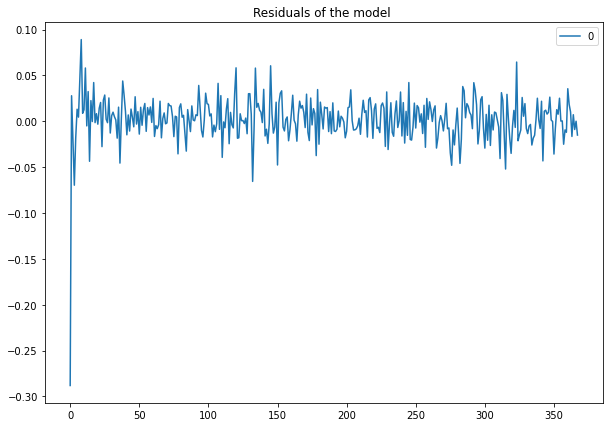

Test RMSE: 0.045
MAD:  0.017


In [28]:

#Fit an ARIMA model on the training set. Evaluate your model with the test data by computing the RSME and MAD metrics. 
 # fit an ARIMA model and plot residual errors

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# create the model 

model = ARIMA(train, order=(15,0,0))

# fit the model 
model_fit = model.fit(disp=0)


predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test, predictions))

# get the residuals 
residuals = pd.DataFrame(model_fit.resid)
# plot the residuals 
residuals.plot(title = "Residuals of the model ")
plt.show()

print('Test RMSE: %.3f' % rmse)
print('MAD:  %.3f' % residuals.mad())




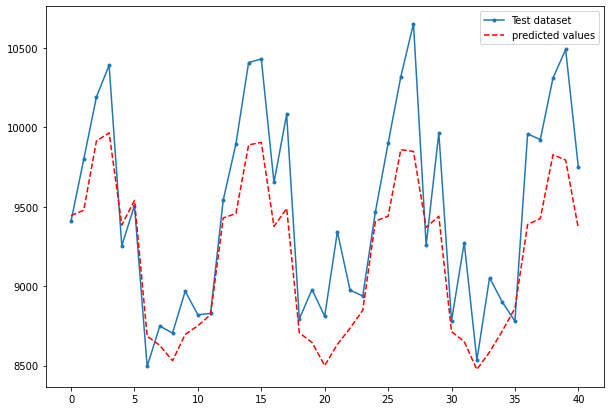

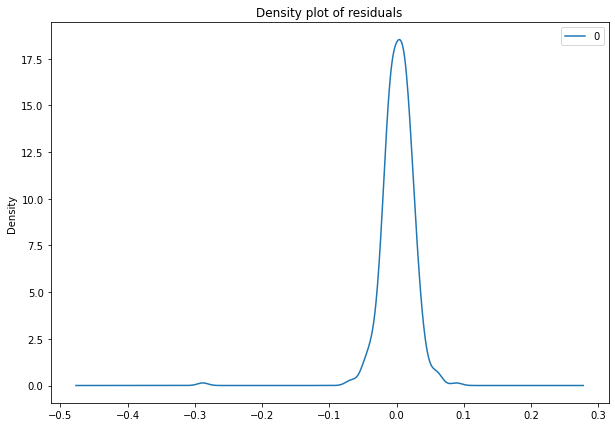

In [38]:

# plot results of Arima 
plt.plot(np.exp(test),'.-')
plt.plot(np.exp(predictions), '--',color='red')
plt.legend(["Test dataset","predicted values"])
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.title("Density plot of residuals")
plt.show()


In [1]:


warnings.filterwarnings("ignore")

train = train 
test = test 

p_values = [ 12, 14, 16]
d_values = range(0, 2)
q_values = range(0, 3)
best_score, best_cfg = float("inf"), None    

for p in p_values:        
    for d in d_values:           
        for q in q_values:       
            arima_order=(p,d,q)
            try:          
                model = ARIMA(train, order=arima_order)
                model_fit = model.fit(disp=0)
                predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
                rmse = np.sqrt(mean_squared_error(test, predictions))                    
                if rmse < best_score:                        
                    best_score, best_cfg = rmse, arima_order                 
                    print('ARIMA%s RMSE=%.3f' % (arima_order,rmse))                
            except:                   
                continue    

print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))                    
 

NameError: name 'warnings' is not defined

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test RMSE: 0.040
MAD:  0.016


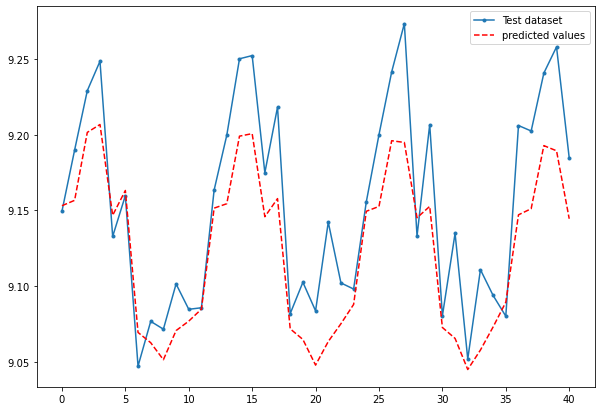

In [41]:

# train the model with best order values ( 16,0,2) and plot the results

model = ARIMA(train, order=(16,0,2))

# fit the model 

model_fit = model.fit(disp=0)
# prediction 
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# calculate RMSE after converting the test and peridiction back to original form ( using np.exp), because I applied log tranformationin previous exercise.
rmse = np.sqrt(mean_squared_error(test, predictions))
residuals = pd.DataFrame(model_fit.resid)
# print the rmse. 

print('Test RMSE: %.3f' % rmse)
print('MAD:  %.3f' % residuals.mad())
# plot the prediction vs test data 


# plot results of Arima 
plt.plot(test,'.-')
plt.plot(predictions, '--',color='red')
plt.legend(["Test dataset","predicted values"])
plt.show()




## Spatial analysis of elevation in the Netherlands

In [31]:

#  Load the dataset "Gementen data.csv" and drop all the rows with missing data

# load the dataset
gementen = pd.read_csv("data/Gemeenten_dataset.csv")
# print the head of dat
print(gementen.head(5))
# Checking the null values 
print("Any Null values?", gementen.isnull().any().sum())

# dropping the null values 
#gementen = gementen.dropna(inplace= True)

# checking the data again 

#print("Any Null values left?", gementen.isnull().any().sum())


  GM_CODE     GM_NAAM  ELEVATION  LATITUDE  LONGITUDE  Average_House_Price  \
0  GM0003  Appingedam       0.48     53.32       6.85                194.8   
1  GM0010    Delfzijl       2.03     53.33       6.92                155.1   
2  GM0014   Groningen      14.02     53.22       6.55                258.9   
3  GM0024   Loppersum       2.00     53.33       6.75                192.4   
4  GM0034      Almere       1.92     52.37       5.22                294.3   

   Average_Income  Population_Density  
0            21.6                 493  
1            22.0                 186  
2            23.3                1257  
3            22.6                 192  
4            24.7                1662  
Any Null values? 0


  GM_CODE WATER     SHAPE_Leng    SHAPE_Area  JRSTATCODE     GM_NAAM  \
0  GM0003   NEE   26201.130337  2.457996e+07  2020GM0003  Appingedam   
1  GM0010   NEE  143224.062477  1.362080e+08  2020GM0010    Delfzijl   
2  GM0014   NEE   98454.011502  1.979605e+08  2020GM0014   Groningen   
3  GM0024   NEE   64612.053242  1.119892e+08  2020GM0024   Loppersum   
4  GM0034   NEE   77001.560697  1.392038e+08  2020GM0034      Almere   

                                            geometry  
0  POLYGON ((249539.950 593217.579, 249543.450 59...  
1  MULTIPOLYGON (((267829.905 587996.480, 267824....  
2  POLYGON ((227979.943 584879.819, 227981.153 58...  
3  POLYGON ((244952.159 601043.418, 244954.500 60...  
4  MULTIPOLYGON (((142993.687 482642.725, 142993....  
------------------------------------------------------------------------------------------------------------------------
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 7 columns):
 #  

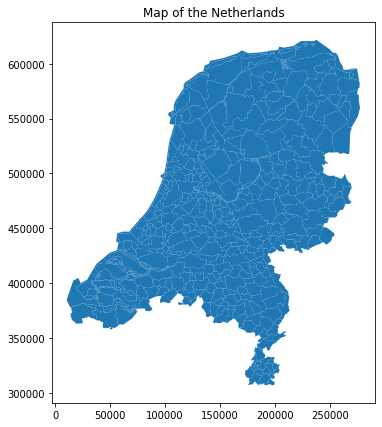

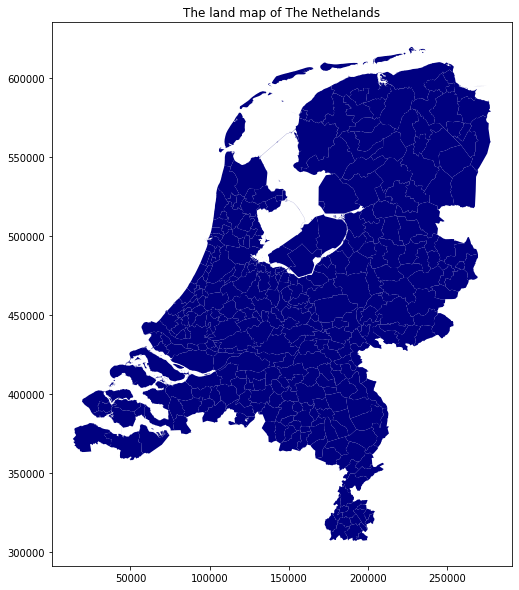

In [32]:

# Load the shapefile of the townships of the Netherlands and display the first five rows. Remove all the polygons representing water.

# load the dataset 
import geopandas as gpd
# loads the shapefile
townships = gpd.read_file("data/bu_wk_gm2020_shapes/Gemeenten2020.shp")
# inspect head of the data 
print(townships.head(5))
print("--"*60)
print(townships.info())

#visualize the data 
print("--"*60)
townships.plot()
plt.title("Map of the Netherlands")
plt.show()


# Remove all the polygons representing water.

land_townships= townships[townships.WATER =="NEE"]

land_townships.plot(figsize = (10, 10), column='WATER',cmap='jet' )
plt.title("The land map of The Nethelands")
plt.show()


2. [10 points] Perform the following for a maximum of 10 points.

(a) Create a new column called Elevation in the geodataframe of the townships and copy over the contents in column Elevation in the dataframe loaded from "Gementen data.csv". [2 points].

(b) Create a new geopandas dataframe with the following columns; GM NAAM, geometry and Elevation from the output of A [2 points].

(c) Drop all the rows with missing values from the output of B [1 points].

(d) From the output of C, create a Choropleth Map of the townships, with colors assigned by Elevation (`columns=Elevation`). Use a quantiles scheme with 5 quantiles [5 points].

In [33]:
#
# Your code goes here 
# (a) Create a new column called Elevation in the geodataframe of the townships and copy over the contents in column Elevation in the dataframe loaded from "Gementen data.csv". [2 points].
townships["Elevation"] = gementen['ELEVATION']  
townships.head()

# 

,GM_CODE,WATER,SHAPE_Leng,SHAPE_Area,JRSTATCODE,GM_NAAM,geometry,Elevation
0,GM0003,NEE,26201.130337,2.457996e+07,2020GM0003,Appingedam,"POLYGON ((249539.950 593217.579, 249543.450 59...",0.48
1,GM0010,NEE,143224.062477,1.362080e+08,2020GM0010,Delfzijl,"MULTIPOLYGON (((267829.905 587996.480, 267824....",2.03
2,GM0014,NEE,98454.011502,1.979605e+08,2020GM0014,Groningen,"POLYGON ((227979.943 584879.819, 227981.153 58...",14.02
3,GM0024,NEE,64612.053242,1.119892e+08,2020GM0024,Loppersum,"POLYGON ((244952.159 601043.418, 244954.500 60...",2.00
4,GM0034,NEE,77001.560697,1.392038e+08,2020GM0034,Almere,"MULTIPOLYGON (((142993.687 482642.725, 142993....",1.92


In [34]:

# (b) Create a new geopandas dataframe with the following columns; GM NAAM, geometry and Elevation from the output of A [2 points].
tonwshipsPart = townships.loc[:,("GM_NAAM", "geometry", "Elevation")]

# inspect the head of dataset
tonwshipsPart.head(3)


,GM_NAAM,geometry,Elevation
0,Appingedam,"POLYGON ((249539.950 593217.579, 249543.450 59...",0.48
1,Delfzijl,"MULTIPOLYGON (((267829.905 587996.480, 267824....",2.03
2,Groningen,"POLYGON ((227979.943 584879.819, 227981.153 58...",14.02


In [35]:
#(c) Drop all the rows with missing values from the output of B [1 points].

# check missing values
mis_nums =tonwshipsPart.isnull().any().sum()
print("Missing value: ",mis_nums)
print("--"*30)
print("start dropping the missing values.........")

tonwshipsPart.dropna(inplace = True)
print("--"*30)
print(f"{mis_nums} missing values dropped")
print("--"*30)
print( "Is there any NULL values left in dataframe?\n",  tonwshipsPart.isnull().any().sum())

Missing value:  1
------------------------------------------------------------
start dropping the missing values.........
------------------------------------------------------------
1 missing values dropped
------------------------------------------------------------
Is there any NULL values left in dataframe?
 0


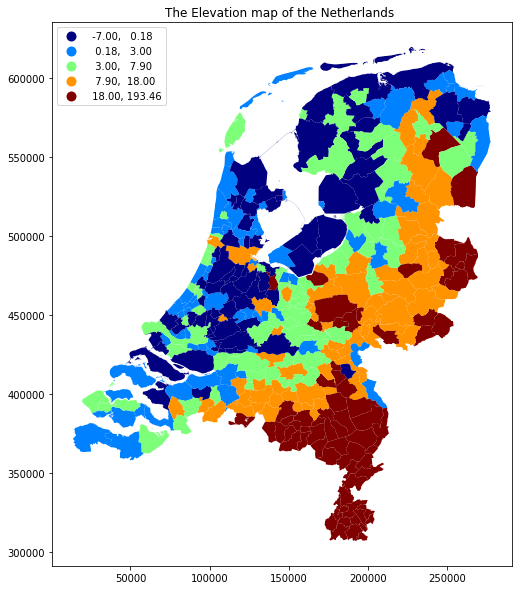

In [36]:
# (d) From the output of C, create a Choropleth Map of the townships, with colors assigned by Elevation (columns=Elevation). Use a quantiles scheme with 5 quantiles [5 points].


# create a Choropleth map 
fig, ax = plt.subplots(figsize=(10, 10))

tonwshipsPart.plot(column='Elevation',scheme='QUANTILES', k=5, cmap='jet',legend=True,ax=ax, legend_kwds={'loc': 'upper left'}),
plt.title("The Elevation map of the Netherlands ")
plt.show()


